In [ ]:
import os
from PIL import Image

def clean_dataset_folder(folder):
    for subdir, dirs, files in os.walk(folder):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                with Image.open(filepath) as img:
                    img.verify()
                    if img.format not in ['JPEG', 'PNG', 'BMP', 'GIF']:
                        print(f"Unsupported format: {filepath}")
                        os.remove(filepath)
            except Exception as e:
                print(f"Corrupt or unreadable file: {filepath}")
                os.remove(filepath)

clean_dataset_folder("C:\Aakash PDFs\Cyber S4\ML\Project\DataSet")

In [ ]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    "C:\Aakash PDFs\Cyber S4\ML\Project\DataSet",
    #local path needs to be changed accordingly
    validation_split=0.2,       
    subset="training",
    seed=124,                   
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    #same here
    "C:\Aakash PDFs\Cyber S4\ML\Project\DataSet",
    validation_split=0.2,
    subset="validation",
    seed=124,
    image_size=(224, 224),
    batch_size=32
)


Found 2531 files belonging to 2 classes.
Using 2025 files for training.
Found 2531 files belonging to 2 classes.
Using 506 files for validation.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),  
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_ds.cardinality().numpy(), activation='softmax')  
])


In [53]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=1
)

#epochs are no of times you run thru the dataset

80/80 ━━━━━━━━━━━━━━━━━━━━ 50s 629ms/step - accuracy: 0.9685 - loss: 0.2261 - val_accuracy: 0.6462 - val_loss: 3.1837


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

y_true = []
y_pred = []

batch_size = 32 
num_batches = len(val_ds)

for i, (images, labels) in enumerate(val_ds):
    preds = model.predict(images)
    predicted_classes = np.argmax(preds, axis=1)
    
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_classes)
    
    if i + 1 >= num_batches:
        break

y_true = np.array(y_true)
y_pred = np.array(y_pred)

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Accuracy: 0.6462
Precision: 0.8107
Recall: 0.6462


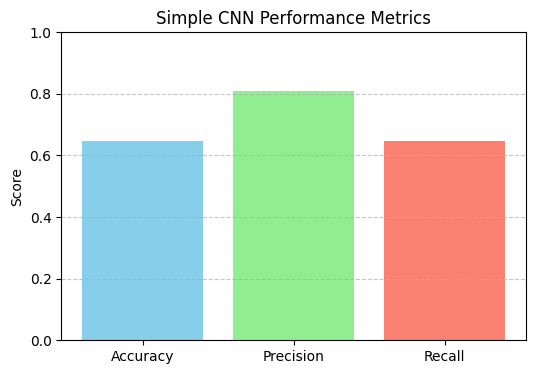

In [ ]:
import matplotlib.pyplot as plt

metrics = {
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec
}

# Plot
plt.figure(figsize=(6, 4))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.title('Simple CNN Performance Metrics')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
